In [13]:
//NISHIT DUDEJA 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data_df = pd.read_csv("train (1).csv")

In [15]:
data_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data_df.shape

(42000, 785)

In [17]:
y=data_df['label']
x=data_df.drop('label',axis=1)

In [18]:
type(x)

pandas.core.frame.DataFrame

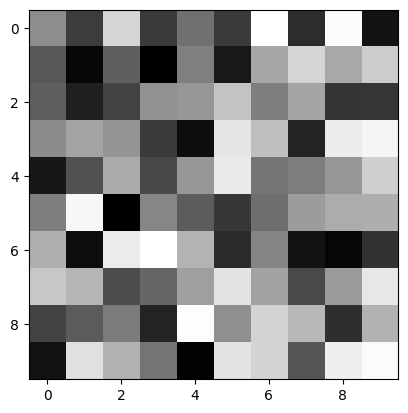

In [19]:
a = np.random.random((10,10))
plt.figure()
plt.imshow(a, cmap='gray')
plt.show()

In [20]:
data = data_df.values[:5000]
data.shape

(5000, 785)

In [21]:
X, y = data[:,1:], data[:, 0]

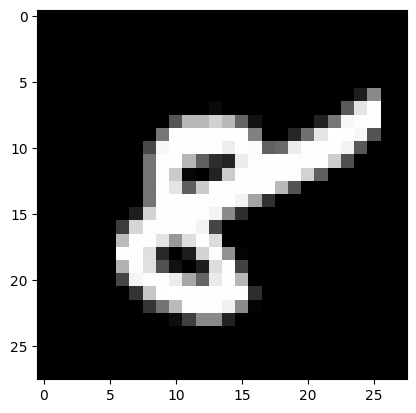

In [22]:
im = X[4997].reshape((28,28))
plt.figure()
plt.imshow(im, cmap='gray')
plt.show()

In [23]:
split = int(X.shape[0] * 0.80)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(y_train)
print(y_test)

(4000, 784) (4000,)
(1000, 784) (1000,)
[1 0 1 ... 6 6 4]
[8 8 0 5 0 0 3 8 2 1 2 5 6 3 0 6 6 1 3 9 6 0 2 4 6 3 2 7 8 3 2 9 9 4 7 2 7
 8 6 1 5 0 9 5 5 2 5 7 4 0 2 9 8 3 2 1 2 4 6 2 3 3 2 1 6 8 5 5 6 1 8 4 4 4
 7 8 1 2 0 4 5 8 2 3 4 2 7 7 9 4 7 5 9 5 7 0 4 0 6 8 5 8 6 0 4 3 6 2 0 9 1
 4 9 7 9 5 6 2 2 0 8 4 2 9 9 5 9 6 9 0 4 0 9 0 6 6 8 4 8 7 3 1 4 9 0 1 7 0
 7 7 3 3 2 4 0 9 6 1 9 2 8 6 5 0 2 1 7 8 0 0 8 6 1 5 4 0 6 6 9 7 7 1 0 8 6
 3 8 5 6 0 8 7 3 2 3 4 5 9 2 5 7 7 1 8 1 7 5 6 4 4 2 6 9 6 7 9 1 2 1 9 6 8
 1 4 2 0 9 4 0 1 1 9 9 1 7 6 2 9 0 3 4 3 2 5 2 0 5 1 8 5 6 0 6 3 7 3 4 4 6
 7 1 3 6 1 5 1 0 3 5 6 0 4 6 3 3 9 2 3 9 3 9 3 4 2 6 3 4 6 4 2 7 9 7 5 1 9
 6 4 0 6 0 3 0 9 9 5 1 1 7 2 1 6 2 3 0 9 1 6 5 9 5 9 2 1 2 2 2 3 1 2 2 6 8
 9 4 9 9 4 4 7 2 3 3 6 8 1 2 3 6 5 6 7 8 8 4 8 2 6 8 0 1 3 6 7 5 1 6 1 6 1
 3 0 9 0 9 1 3 0 2 1 2 4 3 6 2 5 5 0 2 4 0 2 3 3 1 1 0 4 7 4 0 4 1 1 8 3 8
 5 7 7 4 4 3 6 6 5 4 9 2 5 8 6 5 1 5 7 3 9 5 7 8 8 0 7 0 1 6 8 9 1 1 7 9 8
 7 9 3 7 3 9 3 2 1 1 2 7 3 9 1 0 8 2 3 4 0

In [24]:
def knn(X_train, y_train, test_point, k=5):
    
    distances = []
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [26]:
def knn(X_train, y_train, test_point, k=3):
    
    distances = []
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [27]:
def knn(X_train, y_train, test_point, k=7):
    
    distances = []
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [29]:
def knn(X_train, y_train, test_point, k=9):
    
    distances = []
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [30]:
def knn(X_train, y_train, test_point, k=11):
    
    distances = []
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

euclidean(np.array([1,2,3]), np.array([4,5,6]))

5.196152422706632

In [31]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=5):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [32]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=5)

0.928

In [33]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=3):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [34]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=3)

0.926

In [35]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=7):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [36]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=7)

0.926

In [37]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=9):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [38]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=9)

0.931

In [39]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=11):
    
    predictions = []
    
    for test_point in X_test:
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)
    
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [40]:
calculate_accuracy(X_test, y_test, X_train, y_train, k=11)

0.923

In [41]:
test_df = pd.read_csv("test.csv")

In [42]:
test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
test_data = test_df.values
test_images = test_data[:10]
test_images.shape

(10, 785)

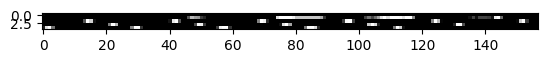

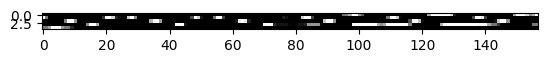

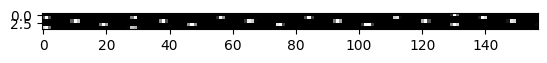

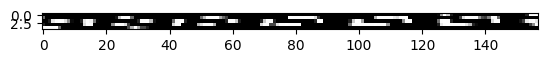

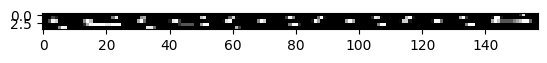

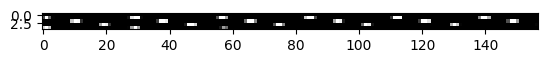

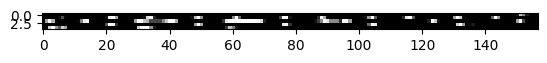

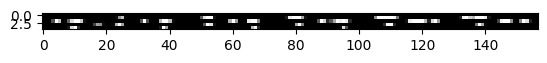

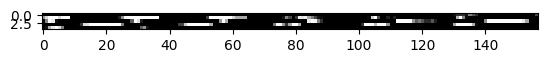

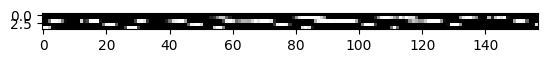

In [46]:
for test in test_images:
    im = test.reshape(5,157)
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [49]:
y_pred = classifier.predict(X_test)
y_pred

array([8, 8, 0, 5, 0, 0, 3, 8, 3, 1, 2, 5, 6, 3, 0, 6, 6, 1, 3, 9, 6, 0,
       2, 4, 6, 3, 2, 7, 8, 5, 2, 9, 9, 4, 1, 2, 7, 3, 6, 1, 8, 0, 9, 5,
       5, 2, 5, 7, 4, 0, 2, 9, 8, 3, 2, 1, 2, 4, 6, 2, 3, 3, 2, 1, 0, 1,
       5, 5, 6, 1, 8, 4, 4, 4, 7, 8, 1, 2, 0, 4, 5, 8, 2, 3, 4, 2, 1, 7,
       9, 4, 7, 5, 1, 5, 4, 0, 4, 8, 6, 8, 5, 8, 6, 0, 4, 3, 6, 2, 0, 9,
       1, 4, 9, 7, 9, 5, 6, 2, 2, 0, 8, 4, 2, 9, 9, 5, 9, 6, 9, 0, 4, 0,
       9, 0, 6, 6, 8, 4, 8, 7, 3, 1, 4, 9, 0, 1, 7, 0, 7, 7, 3, 3, 2, 4,
       0, 9, 6, 1, 9, 2, 8, 6, 3, 0, 0, 1, 7, 8, 0, 6, 5, 6, 1, 5, 1, 0,
       6, 6, 9, 7, 7, 1, 0, 5, 6, 3, 8, 5, 6, 0, 7, 7, 3, 2, 0, 4, 5, 9,
       2, 5, 7, 7, 1, 8, 1, 7, 5, 6, 4, 4, 2, 6, 9, 6, 1, 9, 1, 2, 1, 9,
       6, 8, 1, 4, 2, 0, 9, 4, 0, 1, 1, 9, 9, 1, 4, 6, 4, 9, 0, 3, 4, 3,
       2, 5, 2, 0, 2, 1, 8, 5, 6, 0, 6, 3, 7, 3, 4, 4, 6, 7, 1, 3, 6, 1,
       5, 1, 0, 3, 5, 6, 0, 4, 6, 3, 3, 9, 2, 3, 9, 3, 9, 3, 4, 2, 6, 3,
       4, 6, 9, 2, 7, 9, 7, 5, 1, 9, 6, 4, 0, 6, 0,

In [50]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test, y_pred))

0.926


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        94
           1       0.89      0.98      0.94       112
           2       0.98      0.91      0.95       115
           3       0.91      0.95      0.93       110
           4       0.92      0.97      0.94        88
           5       0.92      0.89      0.90        90
           6       0.94      0.98      0.96       103
           7       0.91      0.88      0.89        97
           8       0.97      0.83      0.90        94
           9       0.89      0.91      0.90        97

    accuracy                           0.93      1000
   macro avg       0.93      0.92      0.92      1000
weighted avg       0.93      0.93      0.93      1000



In [52]:
print(confusion_matrix(y_test, y_pred))

[[ 90   0   0   0   0   0   3   0   1   0]
 [  0 110   0   1   0   0   0   1   0   0]
 [  3   1 105   1   1   0   0   2   0   2]
 [  1   0   0 104   1   3   0   0   0   1]
 [  0   1   0   0  85   0   0   0   0   2]
 [  1   0   1   3   1  80   2   0   1   1]
 [  1   0   0   0   0   1 101   0   0   0]
 [  0   6   0   0   2   0   0  85   0   4]
 [  2   3   0   5   0   3   1   1  78   1]
 [  0   2   1   0   2   0   0   4   0  88]]
